In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [60]:
import os

dataset_path = '/kaggle/input/digit-recognizer'  # replace with your actual folder name
print(os.listdir(dataset_path))


['sample_submission.csv', 'train.csv', 'test.csv']


In [61]:
import pandas as pd 

In [62]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [63]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_train.shape 

(42000, 785)

In [65]:
df_test.shape 

(28000, 784)

In [66]:
import matplotlib.pyplot as plt

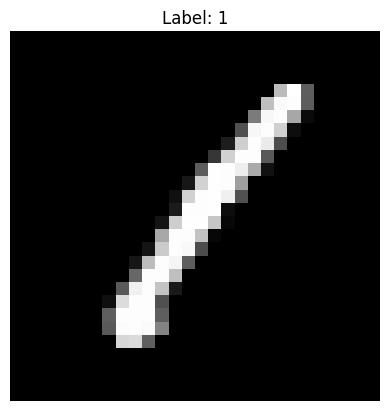

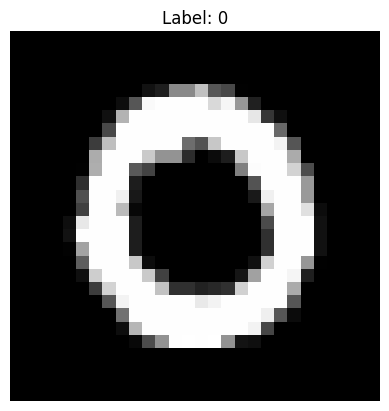

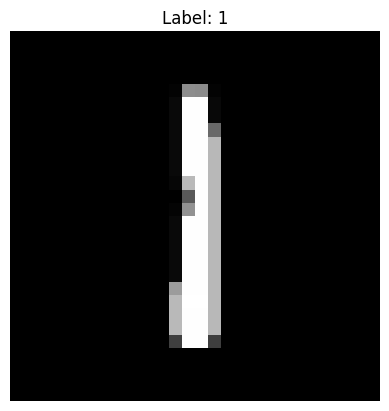

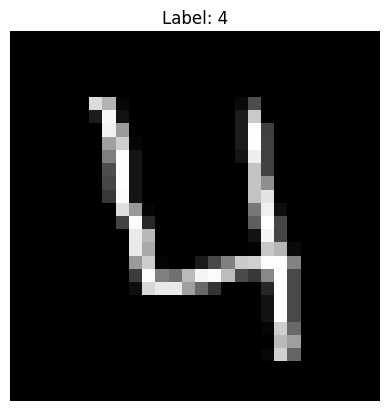

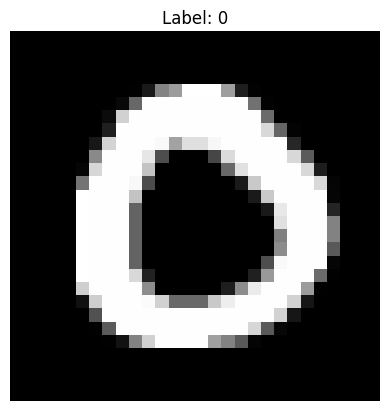

In [67]:
for i in range(5):
    pixels = df_train.iloc[i, 1:].values  # skip label (if column 0 is the digit label)
# Convert to 28x28 and plot
    img = pixels.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {df_train.iloc[i,0]}")  # assuming column 0 is label
    plt.axis('off')
    plt.show()

In [68]:
x = df_train.drop("label", axis=1) 
y = df_train["label"]

In [69]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#x_test = df_test.drop("label", axis = 1)
#y_test = df_train["label"]

In [71]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
x_normalised = x/255.0

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_normalised , y, test_size=0.20, random_state=42)

In [97]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100 )
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [98]:
#pred = model.predict(df_test)

In [99]:
y_pred = model.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9216666666666666

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
print(cm)

[[787   0   1   1   3  12  10   1   1   0]
 [  0 890   4   0   1   3   1   3   6   1]
 [  4  15 756  11  13   7  11   9  20   0]
 [  1   3  28 818   0  37   2   9  25  14]
 [  4   2   5   1 782   1  10   5   5  24]
 [  6   4   8  24  10 619  17   2   9   3]
 [  8   1   7   0   4   8 752   2   3   0]
 [  0   1  10   6  14   5   1 824   5  27]
 [  4  11   6  30   7  26   6   4 736   5]
 [  5   4   5  12  14   7   0  28   8 755]]


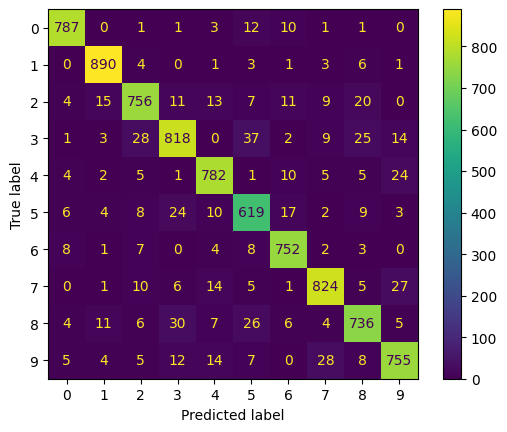

In [79]:
    import matplotlib.pyplot as plt
    from sklearn.metrics import ConfusionMatrixDisplay

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

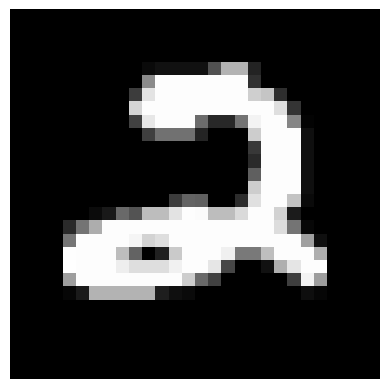

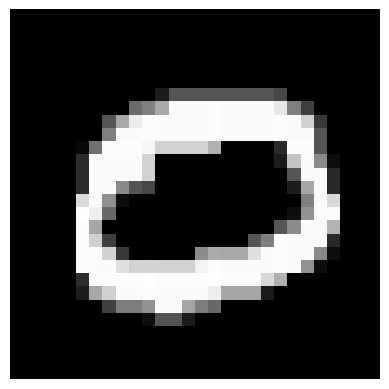

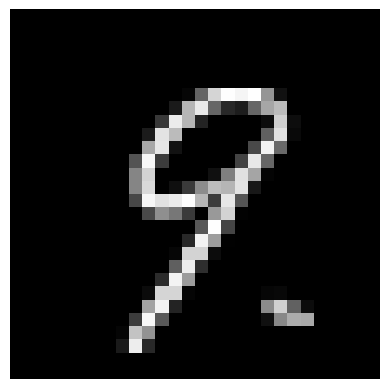

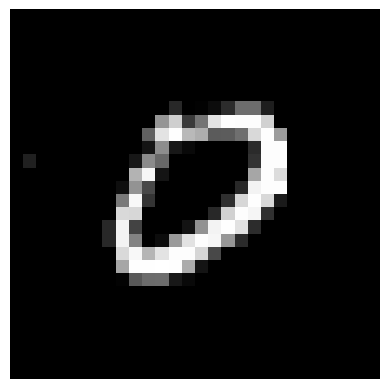

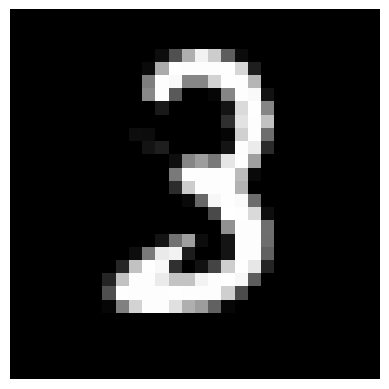

In [80]:
for i in range(5):
    pixels = df_test.iloc[i, 0:].values  # skip label (if column 0 is the digit label)
# Convert to 28x28 and plot
    img = pixels.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    #plt.title(f"Label: {df_test.iloc[i,0]}")  # assuming column 0 is label
    plt.axis('off')
    plt.show()